In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import imutils
from google.colab.patches import cv2_imshow
from sklearn.metrics.pairwise import pairwise_distances_argmin
import seaborn as sns 
from sklearn import metrics

In [2]:
clusters = 5

In [3]:
img = cv2.imread('/content/sample_data/t4.jpeg')

In [4]:
dimensions = img.shape

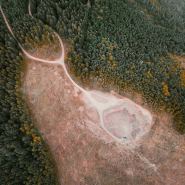

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [5]:
height = img.shape[0]
width  = img.shape[1]
channels = img.shape[2]

In [6]:
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (750, 750, 3)
Image Height       :  750
Image Width        :  750
Number of Channels :  3


In [7]:
org_img = img.copy()
print('Orginal image shape  =  ',img.shape)

Orginal image shape  =   (750, 750, 3)


In [8]:
img = imutils.resize(img,height=185)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (185, 185, 3)


In [9]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

After Flattening shape -->  (34225, 3)


In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
agglomerative = AgglomerativeClustering(n_clusters=clusters).fit(flat_img)

In [12]:
percentages = (np.unique(agglomerative.labels_,return_counts=True)[1])/flat_img.shape[0]

In [13]:
x=[]
for i in range(len(percentages)):
  number = percentages[i]
  f = '{0:.3g}'.format(number)
  x.append(f)
x = [float(i)*100 for i in x]

In [14]:
x = sorted(x,reverse=True)
print(x)

[38.1, 22.3, 17.8, 12.5, 9.34]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Range of proportion')

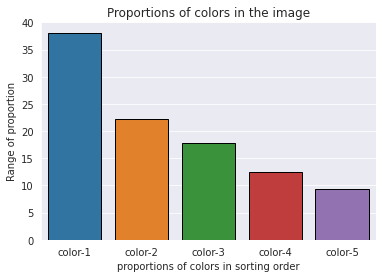

In [15]:
sns.set_style('darkgrid')
tick_label = ['color-1', 'color-2', 'color-3', 'color-4', 'color-5']
sns.barplot(tick_label,x, edgecolor='k')
plt.title('Proportions of colors in the image')
plt.xlabel('proportions of colors in sorting order')
plt.ylabel('Range of proportion')

# **Performance Evaluation**

**Davies-Bouldin Index**

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [16]:
from sklearn.metrics import davies_bouldin_score

In [17]:
labels = agglomerative.labels_
davies_bouldin_score(flat_img, labels)

0.6825747772013022

**Silhouette Coefficient**

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

 
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

**Advantages :**
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

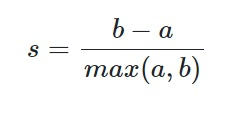

In [18]:
metrics.silhouette_score(flat_img, labels, metric='euclidean')

0.43930671627084406

In [19]:
metrics.silhouette_score(flat_img, labels, metric='manhattan')

0.43891284381906964

In [20]:
metrics.silhouette_score(flat_img, labels, metric='hamming') #hamming used to measure number of dissimilar components

0.01599096889510526